In [2]:
import sys

sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from utils.data import *
from utils.visualization import *

DATA_DIR = '../data/'
RESULTS_DIR = '../results_new/'

### Numerical phantom

In [3]:
results_path = os.path.join(RESULTS_DIR, 'numerical')

IP_gt = load_mat(os.path.join(DATA_DIR, 'IP.mat'))
SOS_gt = load_mat(os.path.join(DATA_DIR, 'SOS_easy.mat'))

IP_gt = standardize(IP_gt)
data_range_img = IP_gt.max() - IP_gt.min()

vmax, vmin = 5, -1
norm = plt.Normalize(vmax=vmax, vmin=vmin)

#### Delay-and-sum

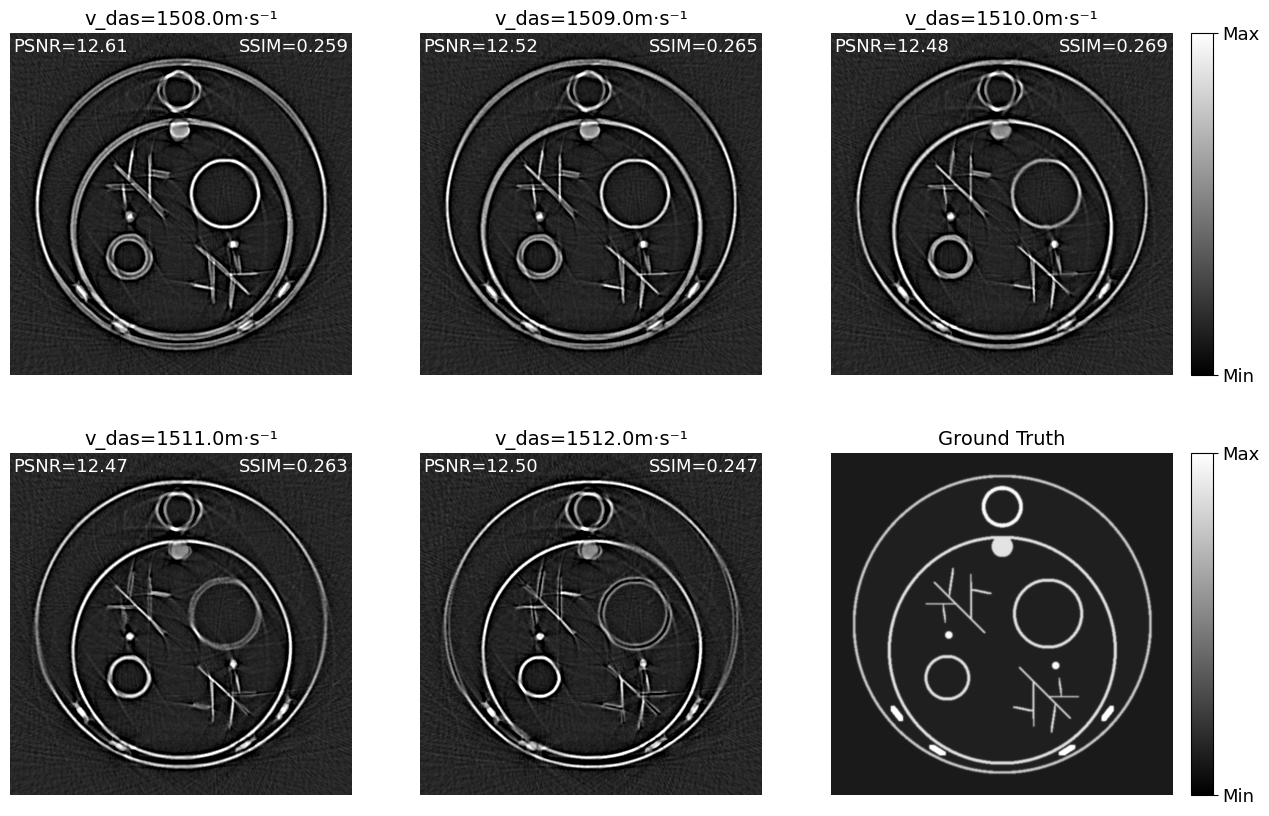

In [4]:
v_das_list = [1508, 1509, 1510, 1511, 1512]

fig = plt.figure(figsize=(15,10))
for idx, v_das in enumerate(v_das_list):
    IP_rec = load_mat(os.path.join(results_path, 'DAS', 'v_das={:.1f}m·s⁻¹'.format(v_das), 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    ax = plt.subplot(2,3,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm)
    plt.axis('off')
    plt.title('v_das={:.1f}m·s⁻¹'.format(v_das), fontsize=14)
    plt.title('PSNR={:.2f}'.format(psnr(IP_gt, IP_rec, data_range=data_range_img)), loc='left', x=0.01, y=0.92, fontsize=13, color='white')
    plt.title('SSIM={:.3f}'.format(ssim(IP_gt, IP_rec, data_range=data_range_img)), loc='right', x=0.99, y=0.92, fontsize=13, color='white')
    if idx == 2:
        cax = fig.add_axes([ax.get_position().x1+0.012, ax.get_position().y0, 0.015, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([vmax, vmin])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)
    
ax = plt.subplot(2,3,6)
plt.imshow(IP_gt, cmap='gray', norm=norm)
plt.axis('off')
plt.title('Ground Truth', fontsize=14)
cax = fig.add_axes([ax.get_position().x1+0.012, ax.get_position().y0, 0.015, ax.get_position().height])
cb = plt.colorbar(cax=cax, norm=norm)
cb.set_ticks([vmax, vmin])
cb.set_ticklabels(['Max', 'Min'], fontsize=13)

#### Dual-SOS DAS

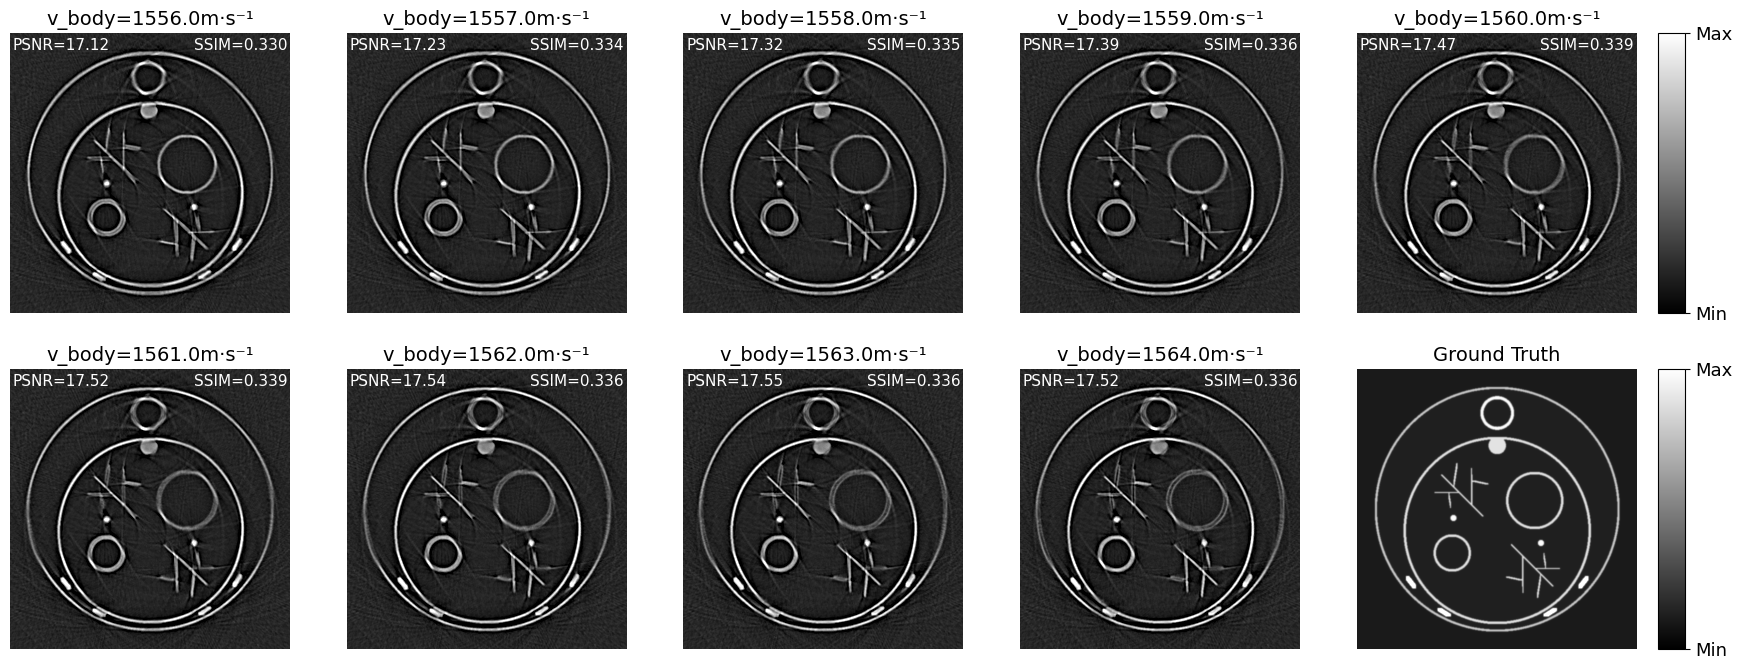

In [5]:
v_body_list = [1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564]

fig = plt.figure(figsize=(21,8))
for idx, v_body in enumerate(v_body_list):
    IP_rec = load_mat(os.path.join(results_path, 'Dual-SOS_DAS', 'v_body={:.1f}m·s⁻¹'.format(v_body), 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    ax = plt.subplot(2,5,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm)
    plt.axis('off')
    plt.title('v_body={:.1f}m·s⁻¹'.format(v_body), fontsize=14)
    plt.title('PSNR={:.2f}'.format(psnr(IP_gt, IP_rec, data_range=data_range_img)), loc='left', x=0.01, y=0.91, fontsize=11, color='white')
    plt.title('SSIM={:.3f}'.format(ssim(IP_gt, IP_rec, data_range=data_range_img)), loc='right', x=0.99, y=0.91, fontsize=11, color='white')
    if idx == 4:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([vmax, vmin])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)
    
ax = plt.subplot(2,5,10)
plt.imshow(IP_gt, cmap='gray', norm=norm)
plt.axis('off')
plt.title('Ground Truth', fontsize=14)
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
cb = plt.colorbar(cax=cax, norm=norm)
cb.set_ticks([vmax, vmin])
cb.set_ticklabels(['Max', 'Min'], fontsize=13)

### Leaf Phantom

In [6]:
results_path = os.path.join(RESULTS_DIR, 'phantom')

vmax, vmin = 6, -4
norm = plt.Normalize(vmax=vmax, vmin=vmin)

#### Delay-and-sum

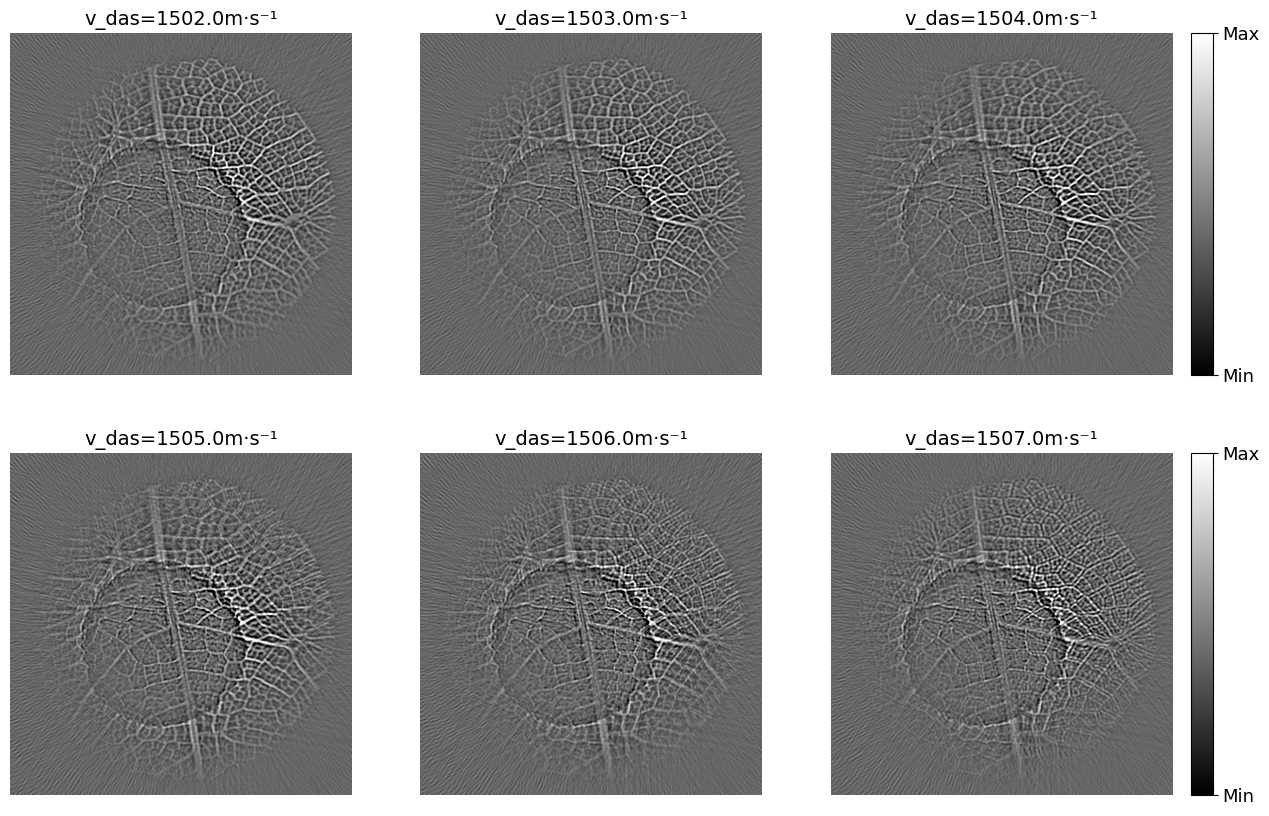

In [7]:
v_das_list = [1502, 1503, 1504, 1505, 1506, 1507]

fig = plt.figure(figsize=(15,10))
for idx, v_das in enumerate(v_das_list):
    IP_rec = load_mat(os.path.join(results_path, 'DAS', 'v_das={:.1f}m·s⁻¹'.format(v_das), 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    ax = plt.subplot(2,3,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm)
    plt.axis('off')
    plt.title('v_das={:.1f}m·s⁻¹'.format(v_das), fontsize=14)
    if (idx+1) % 3 == 0:
        cax = fig.add_axes([ax.get_position().x1+0.012, ax.get_position().y0, 0.015, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([vmax, vmin])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)

#### Dual-SOS DAS

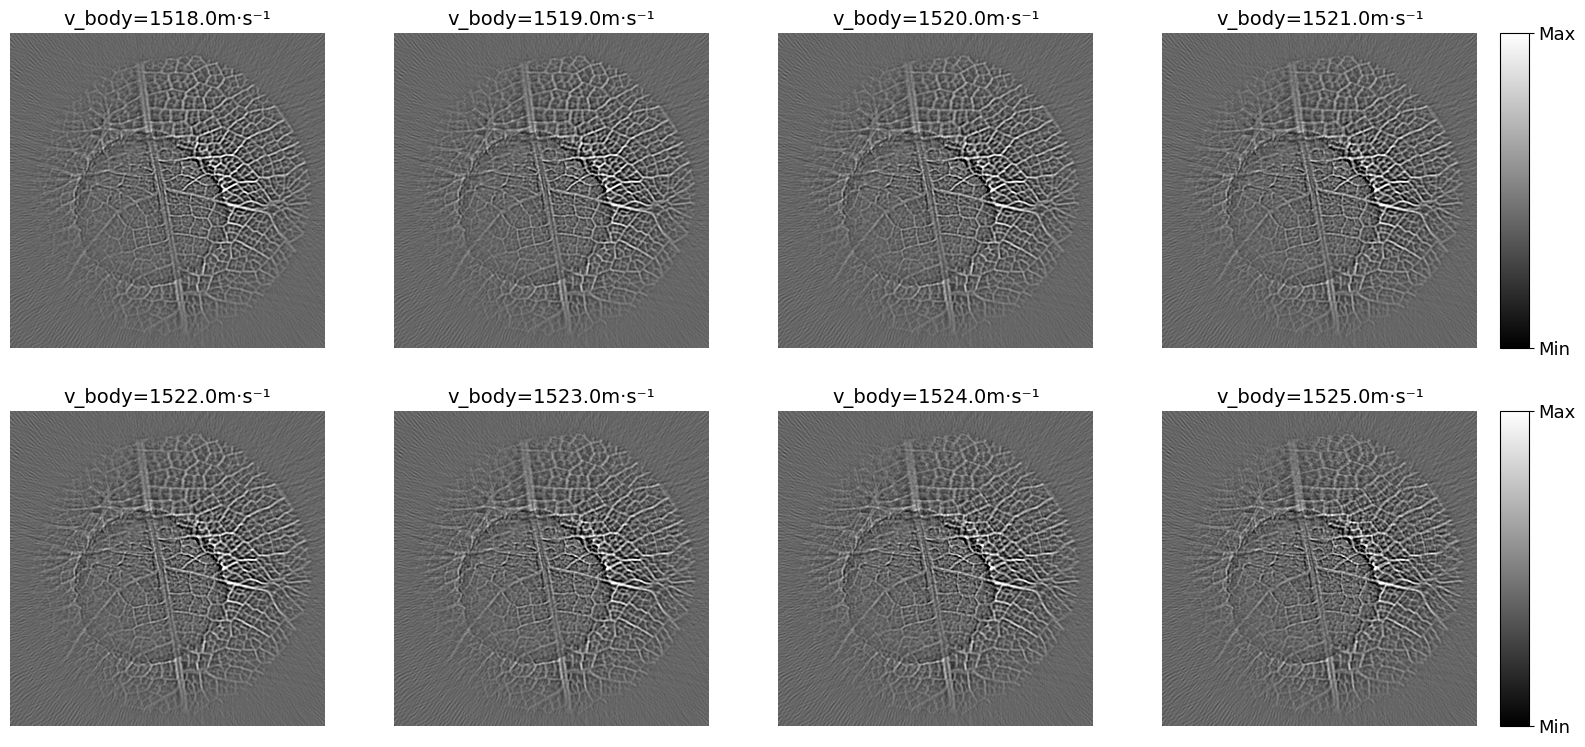

In [8]:
v_body_list = [1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525]

fig = plt.figure(figsize=(19,9))
for idx, v_body in enumerate(v_body_list):
    IP_rec = load_mat(os.path.join(results_path, 'Dual-SOS_DAS', 'v_body={:.1f}m·s⁻¹'.format(v_body), 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    ax = plt.subplot(2,4,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm)
    plt.axis('off')
    plt.title('v_body={:.1f}m·s⁻¹'.format(v_body), fontsize=14)
    if (idx+1) % 4 == 0:
        cax = fig.add_axes([ax.get_position().x1+0.012, ax.get_position().y0, 0.015, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([vmax, vmin])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)

### _In vivo_ Mouse Liver

In [9]:
results_path = os.path.join(RESULTS_DIR, 'in_vivo')

vmax, vmin = 8, -3.5
norm = plt.Normalize(vmax=vmax, vmin=vmin)

#### Delay-and-sum

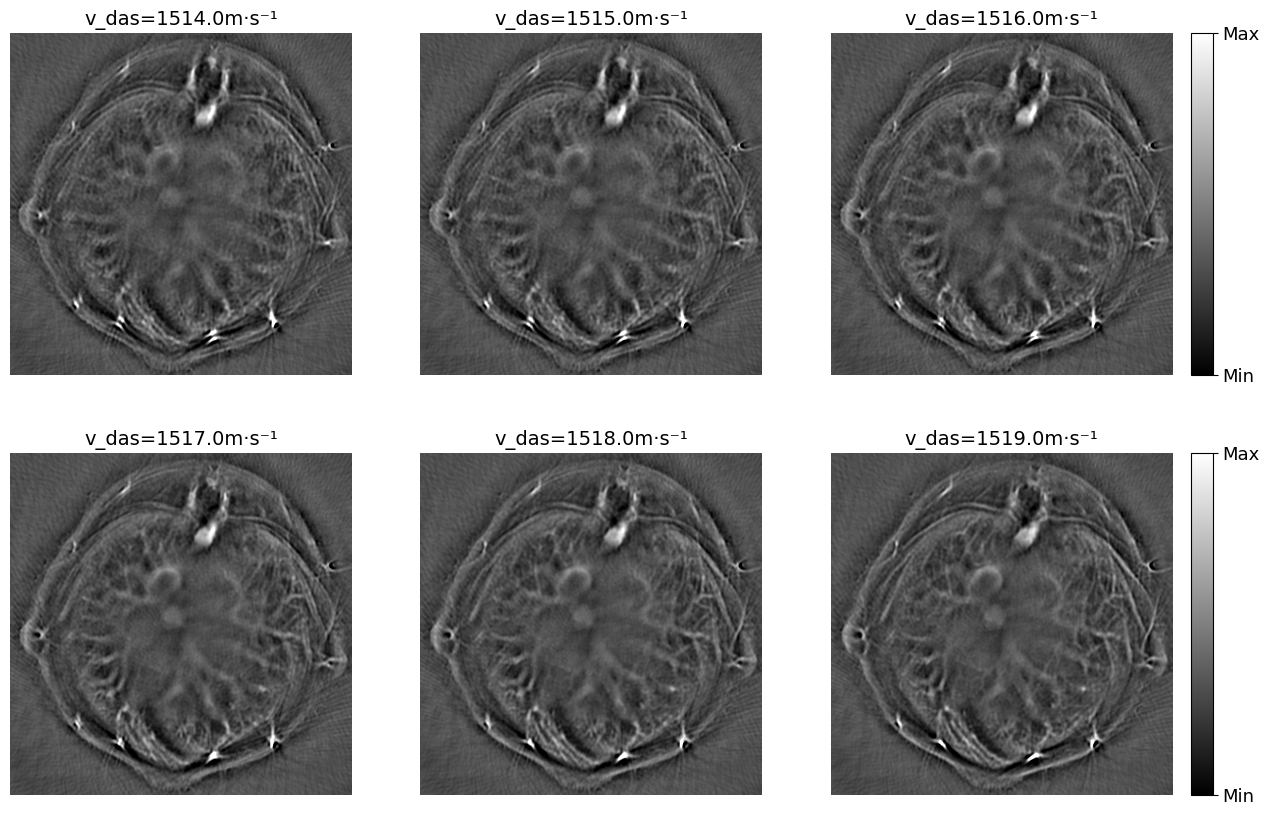

In [10]:
v_das_list = [1514, 1515, 1516, 1517, 1518, 1519]

fig = plt.figure(figsize=(15,10))
for idx, v_das in enumerate(v_das_list):
    IP_rec = load_mat(os.path.join(results_path, 'DAS', 'v_das={:.1f}m·s⁻¹'.format(v_das), 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    ax = plt.subplot(2,3,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm)
    plt.axis('off')
    plt.title('v_das={:.1f}m·s⁻¹'.format(v_das), fontsize=14)
    if (idx+1) % 3 == 0:
        cax = fig.add_axes([ax.get_position().x1+0.012, ax.get_position().y0, 0.015, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([vmax, vmin])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)

#### Dual-SOS DAS

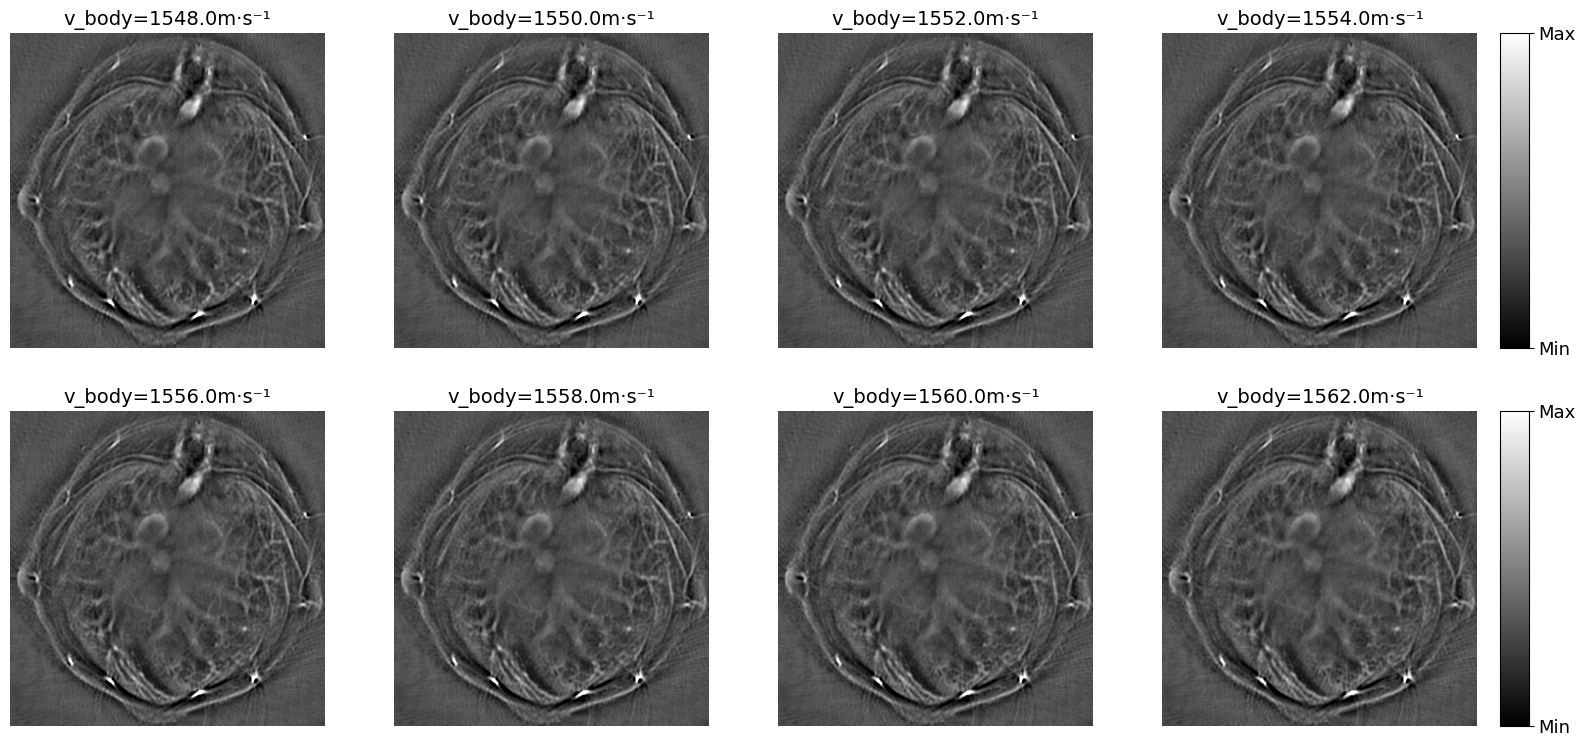

In [15]:
v_body_list = [1548, 1550, 1552, 1554, 1556, 1558, 1560, 1562]

fig = plt.figure(figsize=(19,9))
for idx, v_body in enumerate(v_body_list):
    IP_rec = load_mat(os.path.join(results_path, 'Dual-SOS_DAS', 'v_body={:.1f}m·s⁻¹'.format(v_body), 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    ax = plt.subplot(2,4,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm)
    plt.axis('off')
    plt.title('v_body={:.1f}m·s⁻¹'.format(v_body), fontsize=14)
    if (idx+1) % 4 == 0:
        cax = fig.add_axes([ax.get_position().x1+0.012, ax.get_position().y0, 0.015, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm)
        cb.set_ticks([vmax, vmin])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)